In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("Fashion_Retail_Sales.csv")
df.columns = df.columns.str.strip()
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [3]:
df.shape

(3400, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [5]:
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [6]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


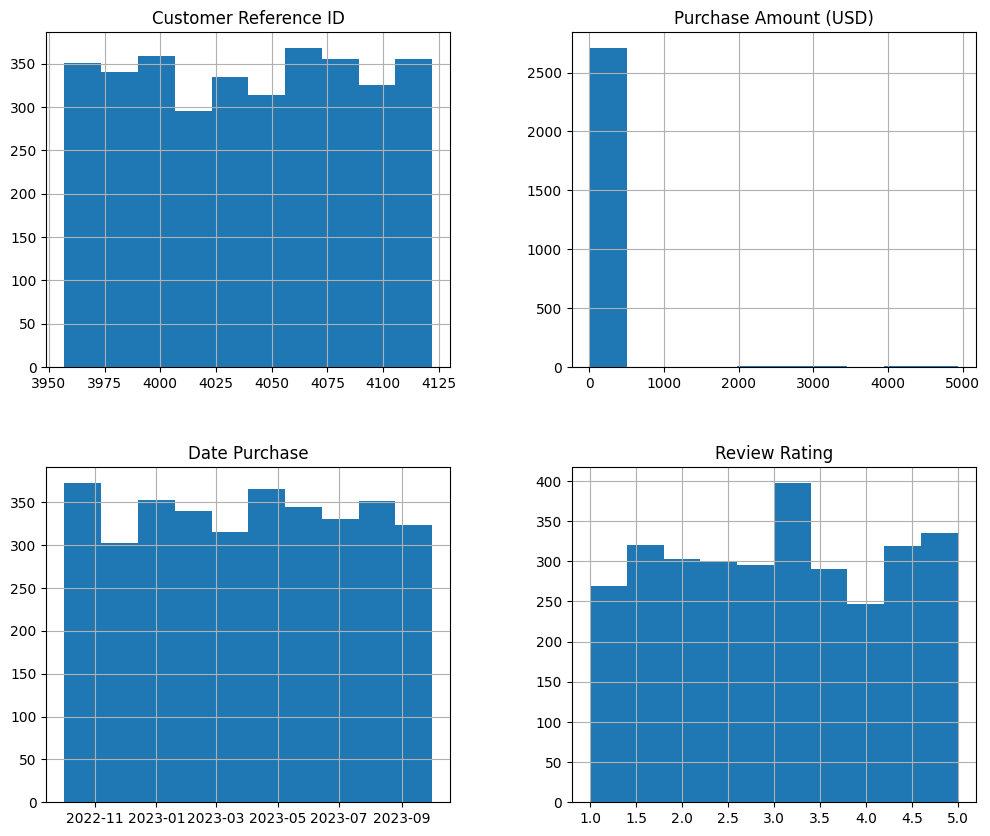

In [30]:
df.hist(figsize=(12,10))
plt.show()

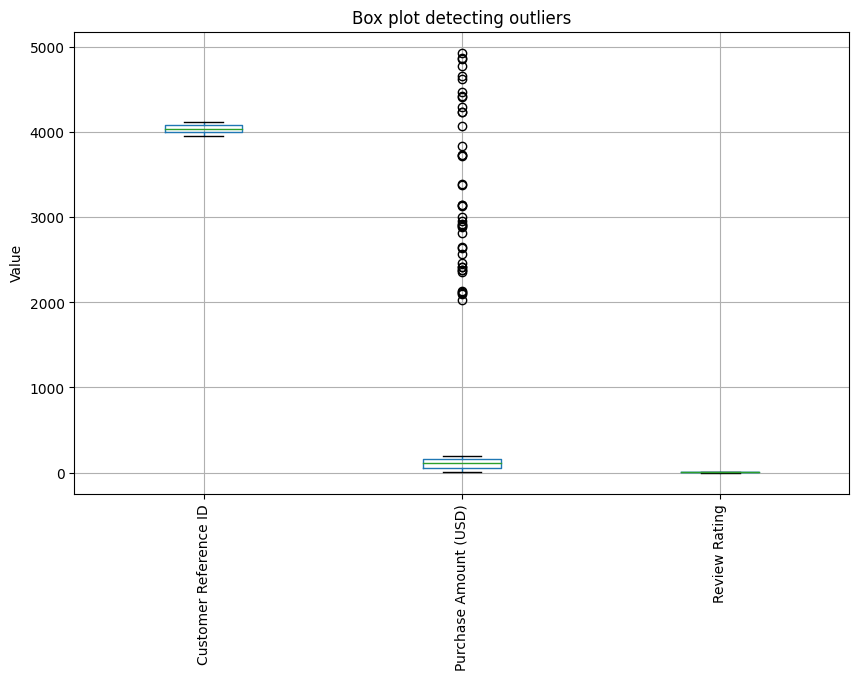

In [31]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title("Box plot detecting outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [36]:
# Calculate Q1, Q3, and IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter out outliers
condition = ~((df_num < (Q1 - 1.2 * IQR)) | (df_num > (Q3 + 1.2 * IQR))).any(axis=1)

# Apply the condition to filter the DataFrame
cleaned_data = df_num[condition]
df_cleaned = df.copy()
df_cleaned = df_cleaned.loc[condition.index[condition]]
df_cleaned.reset_index(drop=True, inplace=True)

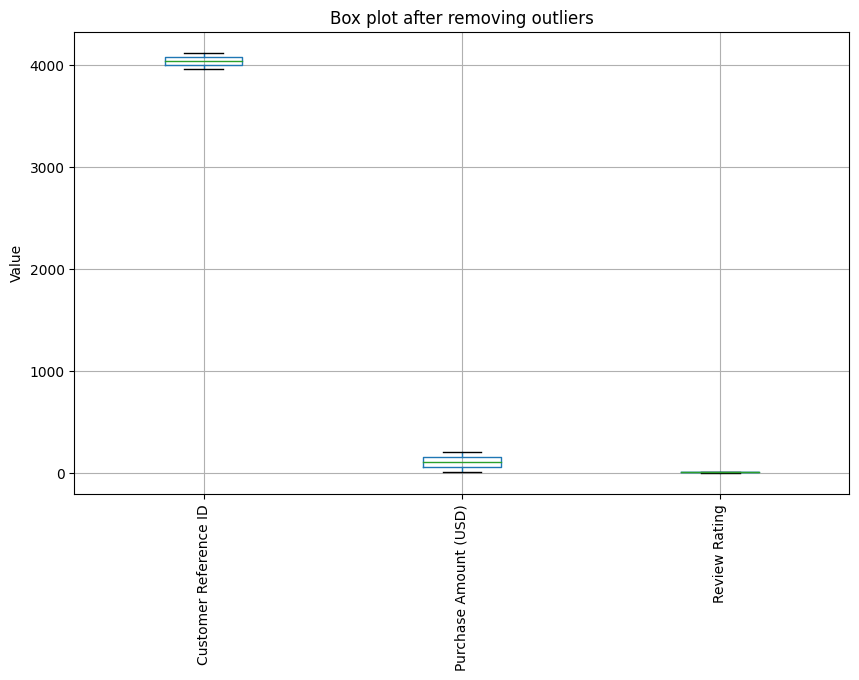

In [37]:
plt.figure(figsize=(10,6))
df_cleaned.boxplot()
plt.title("Box plot after removing outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [38]:
df_cleaned.columns

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')

In [39]:
df_cleaned.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,3992,Backpack,101.0,2022-12-13,1.3,Credit Card
1,4105,Dress,164.0,2022-10-20,3.2,Credit Card
2,4119,Boots,21.0,2023-04-03,3.9,Cash
3,3957,Camisole,147.0,2022-11-04,4.7,Cash
4,3994,Loafers,NaN,2023-05-16,3.9,Cash


### Descriptive Statistics

In [40]:
df_cleaned['Date Purchase'] = pd.to_datetime(df_cleaned['Date Purchase'])

In [41]:
print('\nMean Purchase Amount:', df_cleaned['Purchase Amount (USD)'].mean())
print('\nMedian Purchase Amount:', df_cleaned['Purchase Amount (USD)'].median())
print('\nMode Purchase Amount:', df_cleaned['Purchase Amount (USD)'].mode()[0])
print('\nStandard Deviation of Purchase Amount:', df_cleaned['Purchase Amount (USD)'].std())



Mean Purchase Amount: 106.31695603989657

Median Purchase Amount: 108.0

Mode Purchase Amount: 154.0

Standard Deviation of Purchase Amount: 55.272108082636564


### Time series Analysis

In [42]:
#group by date to analyze sales over time
df_time_series = df_cleaned.groupby('Date Purchase').agg({'Purchase Amount (USD)' : 'sum'}).reset_index()

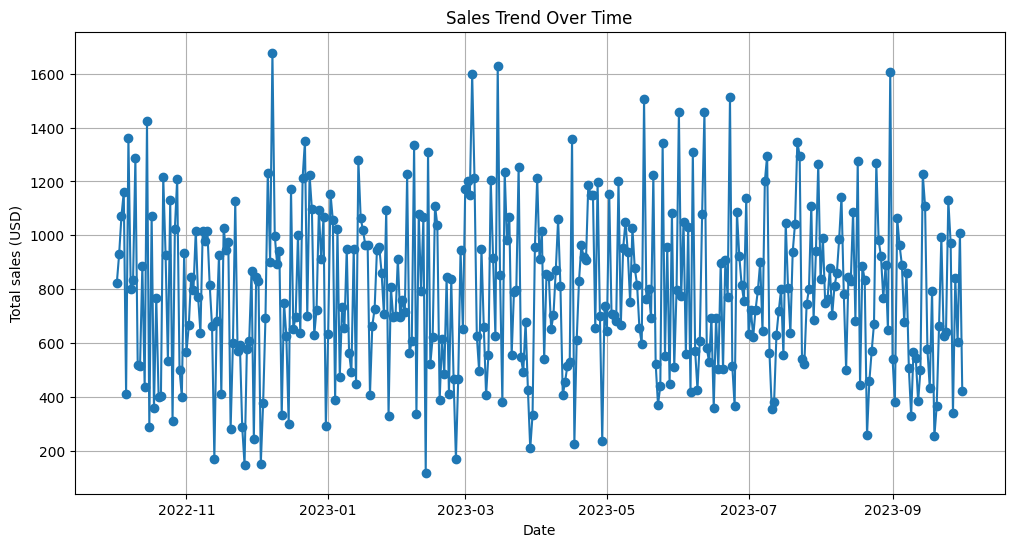

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Date Purchase'], df_time_series['Purchase Amount (USD)'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total sales (USD)')
plt.grid(True)
plt.show()

### Customer and Product Analysis

In [48]:
#top 5 item purchased
top_items = df_cleaned['Item Purchased'].value_counts()
print('\nTop 5 item Purchased:')
top_items.head()


Top 5 item Purchased:


Item Purchased
Belt       89
Skirt      88
Shorts     86
Pants      85
T-shirt    81
Name: count, dtype: int64

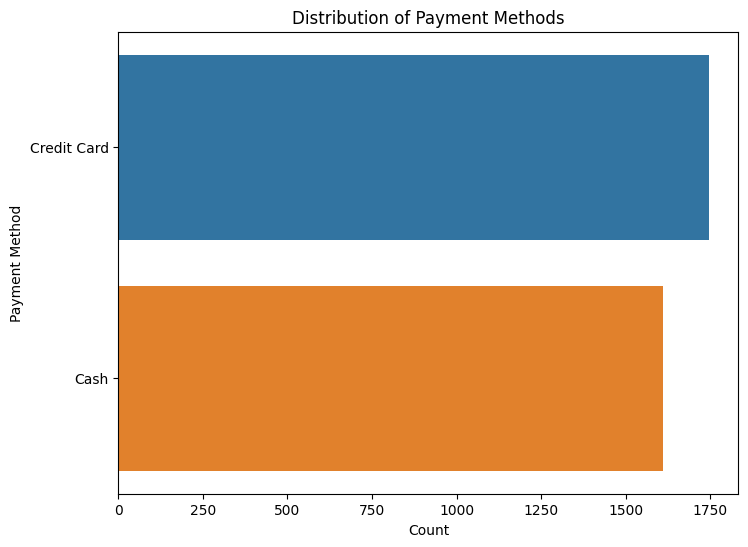

In [49]:
#payment Method distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Payment Method', data=df_cleaned, order=df_cleaned['Payment Method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

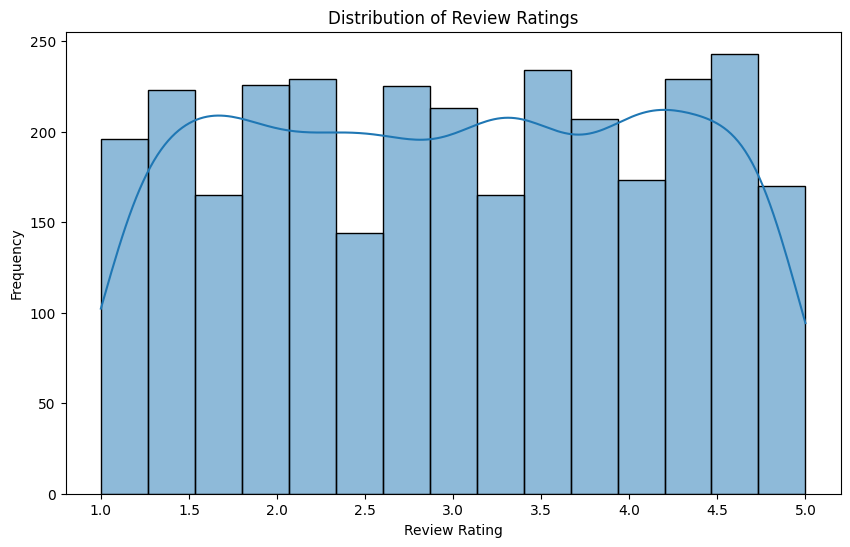

In [50]:
#Customer Demographics 
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Review Rating'], kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

### correlation between numerical variables

In [46]:
df_num = df_cleaned.convert_dtypes().select_dtypes("number")

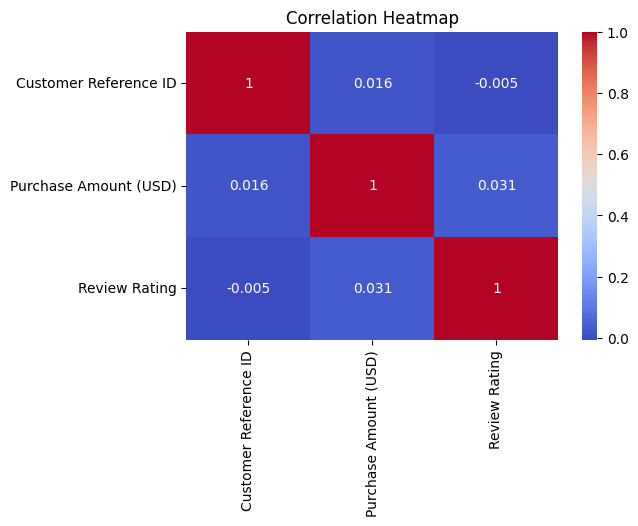

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

****- High sales trends during certain periods may suggest promotional offers or inventory restocking****

****- Payment method preference could guide future payment gateway integrations****

****- Popular items could be promoted further or bundled with other products****